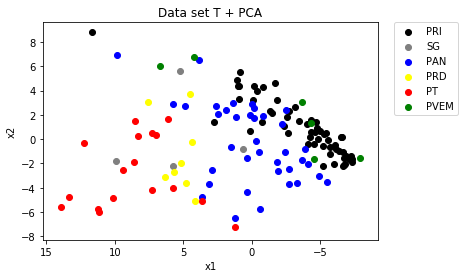

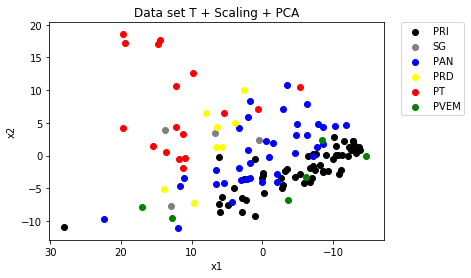

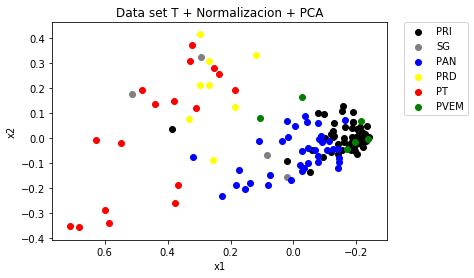

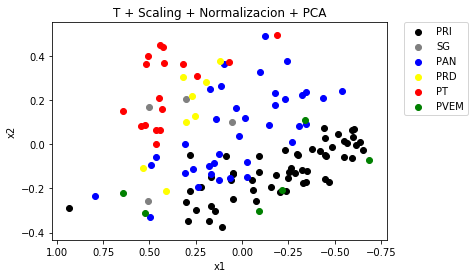

In [223]:
import pandas as pd
import string

#Normalizar
import numpy as np
from sklearn import preprocessing

#PCA
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
from numpy import asarray

# let's load the dataset from scikit-learn once again  
dataset =pd.read_csv("senado.csv", header=None)

def graficarDataSet(title, matrix):
    #////////Targets
    #PRI 0
    #SG 1
    #PAN 2
    #PRD 3
    #PT 4
    #PVEM 5
    #Generar array contenedor de targets de cada registro
    ii=0
    targets = [0 for x in range(129)]
    for i in range(1,129):
        if(dataset.get_value(i,1)=="PRI"):
            targets[ii]=0
        elif(dataset.get_value(i,1)=="SG"):
            targets[ii]=1
        elif(dataset.get_value(i,1)=="PAN"):
            targets[ii]=2
        elif(dataset.get_value(i,1)=="PRD"):
            targets[ii]=3
        elif(dataset.get_value(i,1)=="PT"):
            targets[ii]=4
        elif(dataset.get_value(i,1)=="PVEM"):
            targets[ii]=5
        ii=ii+1
    ii=0

    #Reduccion de dimensiones con PCA
    pca = PCA(n_components=2)
    #fit and transform the data to the model
    reduce_data_pca = pca.fit_transform(matrix)
    #print reduce_data_pca
        
    %matplotlib inline

    #Graficar visualizacion de datos
    #array contenedor de colores de partidos politicos
    colors=['black','gray','blue','yellow','red','green']
    #Generar array contenedor de leyendas en la grafica
    targets_name = [0 for x in range(0,6)]
    targets_name[0]="PRI"
    targets_name[1]="SG"
    targets_name[2]="PAN"
    targets_name[3]="PRD"
    targets_name[4]="PT"
    targets_name[5]="PVEM"

    #convertir de array a numpy array para filtrar cantidatos por partido politico (color)
    targets = asarray(targets)

    #Graficar puntos
    for i in range(len(colors)):
        x = reduce_data_pca[:,0][targets==i]
        y= reduce_data_pca[:,1][targets==i]
        plt.scatter(x,y,c=colors[i])
        plt.legend(targets_name,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(title)
    plt.gca().invert_xaxis()
    plt.show()



#Main---------------------------------------------




#128 registros
#627 columnas

#pro 1
#contra -1
#ausencia por comision oficial y demas 0

# inicializar matriz contnedora de la transformacion de los votos
Matrix = [[0 for x in range(628)] for y in range(129)]
ii=0
jj=0

#Reocrte de dataset (solo tomar los votos) y transformacion de votos a numeros
for i in range(1,129):
    for j in range(3,630):
        if(dataset.get_value(i,j)=="PRO"):
            Matrix[ii][jj]= 1
        elif(dataset.get_value(i,j)=="CONTRA"):
            Matrix[ii][jj]= -1
        else:
            Matrix[ii][jj] = 0
        jj=jj+1
    jj=0
    ii=ii+1


#Dataset transformacion a numerico + PCA
graficarDataSet("Data set T + PCA",Matrix)

#Dataset T + Scaling + PCA + Visualizacion
Matrix_scaled = preprocessing.scale(Matrix)
graficarDataSet("Data set T + Scaling + PCA",Matrix_scaled)

#Dataset T + Normalizacion + PCA + Visualizacion
Matrix_np = np.asanyarray(Matrix)
Matrix_normalizada = preprocessing.normalize(Matrix_np, norm='l2')
#Matrix_cuadrada = Matrix_normalizada**2
graficarDataSet("Data set T + Normalizacion + PCA",Matrix_normalizada)

#Data set T + Scaling + Normalizacion + PCA + visualizacion
Matrix_scaled_np = np.asanyarray(Matrix_scaled)
Matrix_normalizada = preprocessing.normalize(Matrix_scaled_np,norm='l2')
graficarDataSet("T + Scaling + Normalizacion + PCA",Matrix_normalizada)




